## 1、数据预处理
* 导入需要的库
* 导入数据集
* 检查数据是否缺失（整列的**平均值**或者**中间值**替换）
* 划分数据集
* 特征工程（数据标准化、归一化）

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.preprocessing import StandardScaler  #数据标准化
#导入数据集
df=pd.read_csv(r"D:\program_Lab_Report\machine_learning\100day\datasets\Social_Network_Ads.csv")
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values
#划分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#特征工程
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

## 2、逻辑回归模型训练
* sklearn.linear_model库的LogisticRegression类。
* 创建一个LinearRegression类的**classifier**对象。
* 使用LinearRegression类的fit()方法将**classifier**对象对数据集进行训练。

In [2]:
from sklearn.linear_model import LogisticRegression
classifer=LogisticRegression()  #初始化
classifer.fit(x_train,y_train)
print(classifer)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## 3、模型预测

In [3]:
#测试集预测
test_pred=classifer.predict(x_test)
print(test_pred)
#训练集预测
train_ped=classifer.predict(x_train)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


## 4、模型评估

我们预测了测试集。 现在我们将评估逻辑回归模型是否正确的学习和理解。

因此这个混淆矩阵将包含我们模型的正确和错误的预测。

In [4]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, test_pred)
cm_train=confusion_matrix(y_train,classifer.predict(x_train))
print(cm_train)

[[181  18]
 [ 39  82]]


## 5、可视化


D:\anaconda33\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'camp'
  if __name__ == '__main__':


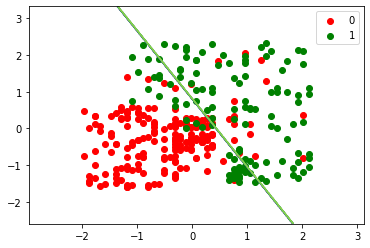

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_set, y_set = x_train,y_train
#创建数据网格，
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step = 0.01))
#绘制等高线图
plt.contour(x1, x2,classifer.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, camp = ListedColormap(('red', 'green')))

#将标签为0的设置为红色，1的设置为绿色
for i,j in enumerate(np.unique(y_train)):
#x_set[y_set == j, 0],j=0或1，即表示x_set第一列中所有数值=j的行  
    plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],color=ListedColormap(("red","green"))(i),label=j)

plt.legend()